In [2]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
path = "20170306000000-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B-EUR-adjusted-MYO-002x002_0024-v02-fv01.nc"
fh = Dataset(path, mode='r')

In [55]:
lons = fh.variables['lon']
lats = fh.variables['lat']
zas = fh.variables['satellite_zenith_angle']

za = np.array(zas)
lo = np.array(lons)[::5]
la = np.array(lats)[::5]
za = za[:, ::5, ::5]
za.shape

(1, 500, 950)

In [56]:
minx, miny, maxx, maxy = lo.min(), la.min(), lo.max(), la.max()
print(minx, miny, maxx, maxy)

-39.99 20.01 54.91 69.91


In [60]:
# Get some parameters for the Stereographic Projection
#lon_0 = lo.mean()
lat_0 = la.mean()

m = Basemap(
    llcrnrlon=minx,
    llcrnrlat=miny,
    urcrnrlon=maxx,
    urcrnrlat=maxy,
    lat_ts=lat_0,
    resolution='h')

In [61]:
lon, lat = np.meshgrid(lo, la)
xi, yi = m(lon, lat)

/home/sascha/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3360: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/sascha/miniconda3/envs/py3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3399: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


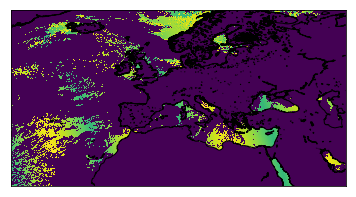

In [63]:
cs = m.pcolor(xi, yi, np.squeeze(za))
m.drawcoastlines()
plt.show()